In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Dataset\Crop_recommendation.csv")
df.head(20)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [9]:
len(df)

2200

In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
x=df["label"].value_counts()
print(x)
print(len(x))

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64
22


## About dataset:

Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

### features of the data:  
N - ratio of Nitrogen content in soil  
P - ratio of Phosphorous content in soil  
K - ratio of Potassium content in soil  
temperature - temperature in degree Celsius  
humidity - relative humidity in %  
ph - ph value of the soil  
rainfall - rainfall in mm  

### Target variable:  
label - name of the corp
There are 22 different types of corps for example: rice, maize, jute, cotton, coconut, papaya, orange, apple etc.  
The dataset is balanced becouse each labels has 100 instances.  
There are total 2200 rows in the dataset.


In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There is no missing value in the dataset

## Let's check the distribution of each features.

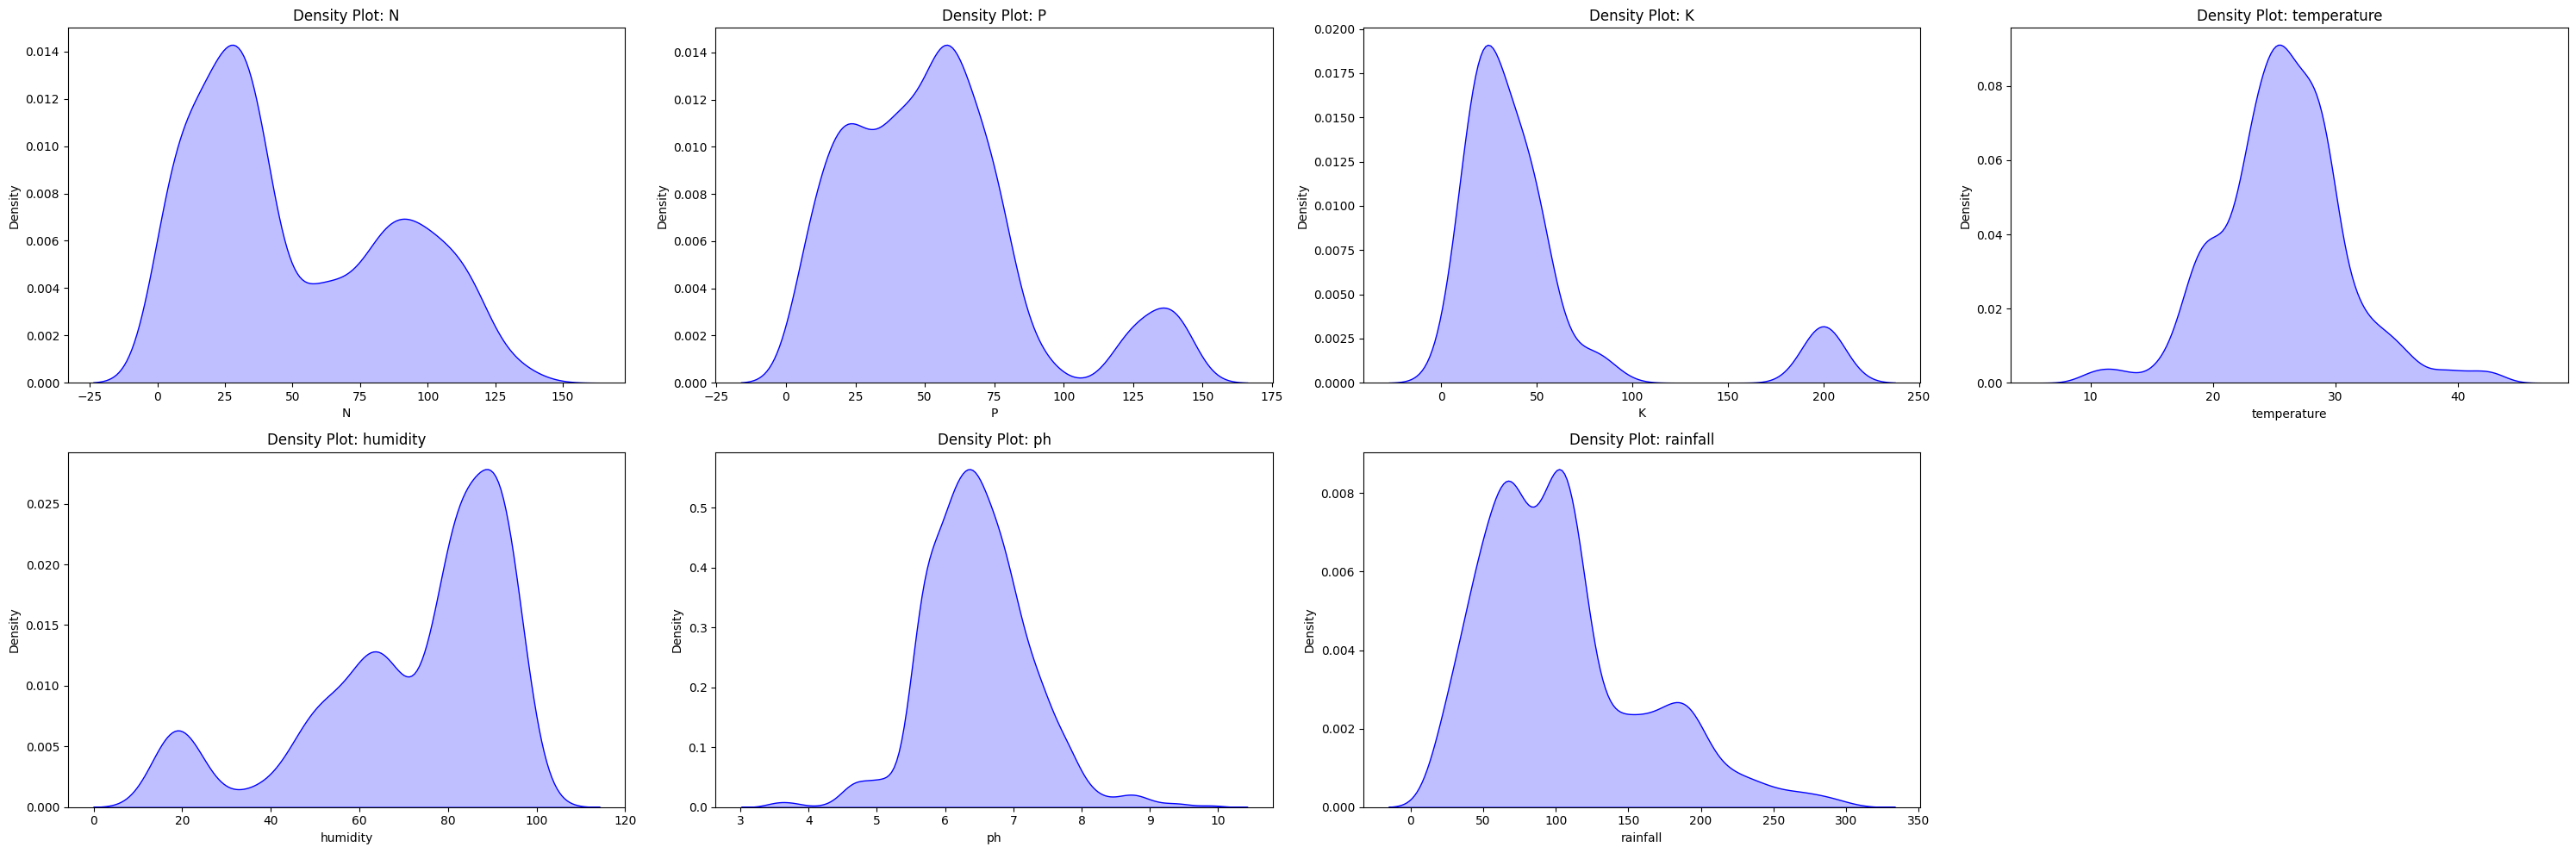

In [26]:
def plot_features_KDE(features):
    fig, axes = plt.subplots(2,4,figsize=(30, 5 * 2))
    axes = axes.flatten()
    for i,col in enumerate(features):
        sns.kdeplot(df[col],ax=axes[i],fill=True,color="blue")
        axes[i].set_title(f"Density Plot: {col}")

    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

features = df.columns[:-1]
plot_features_KDE(features)

From the KDE plot we can conclude that ph and temperature has almost normal distribution.
All the other features are skewed.

### Let's do a bivariate analysis between features and target to find how target is dependent of each feature.

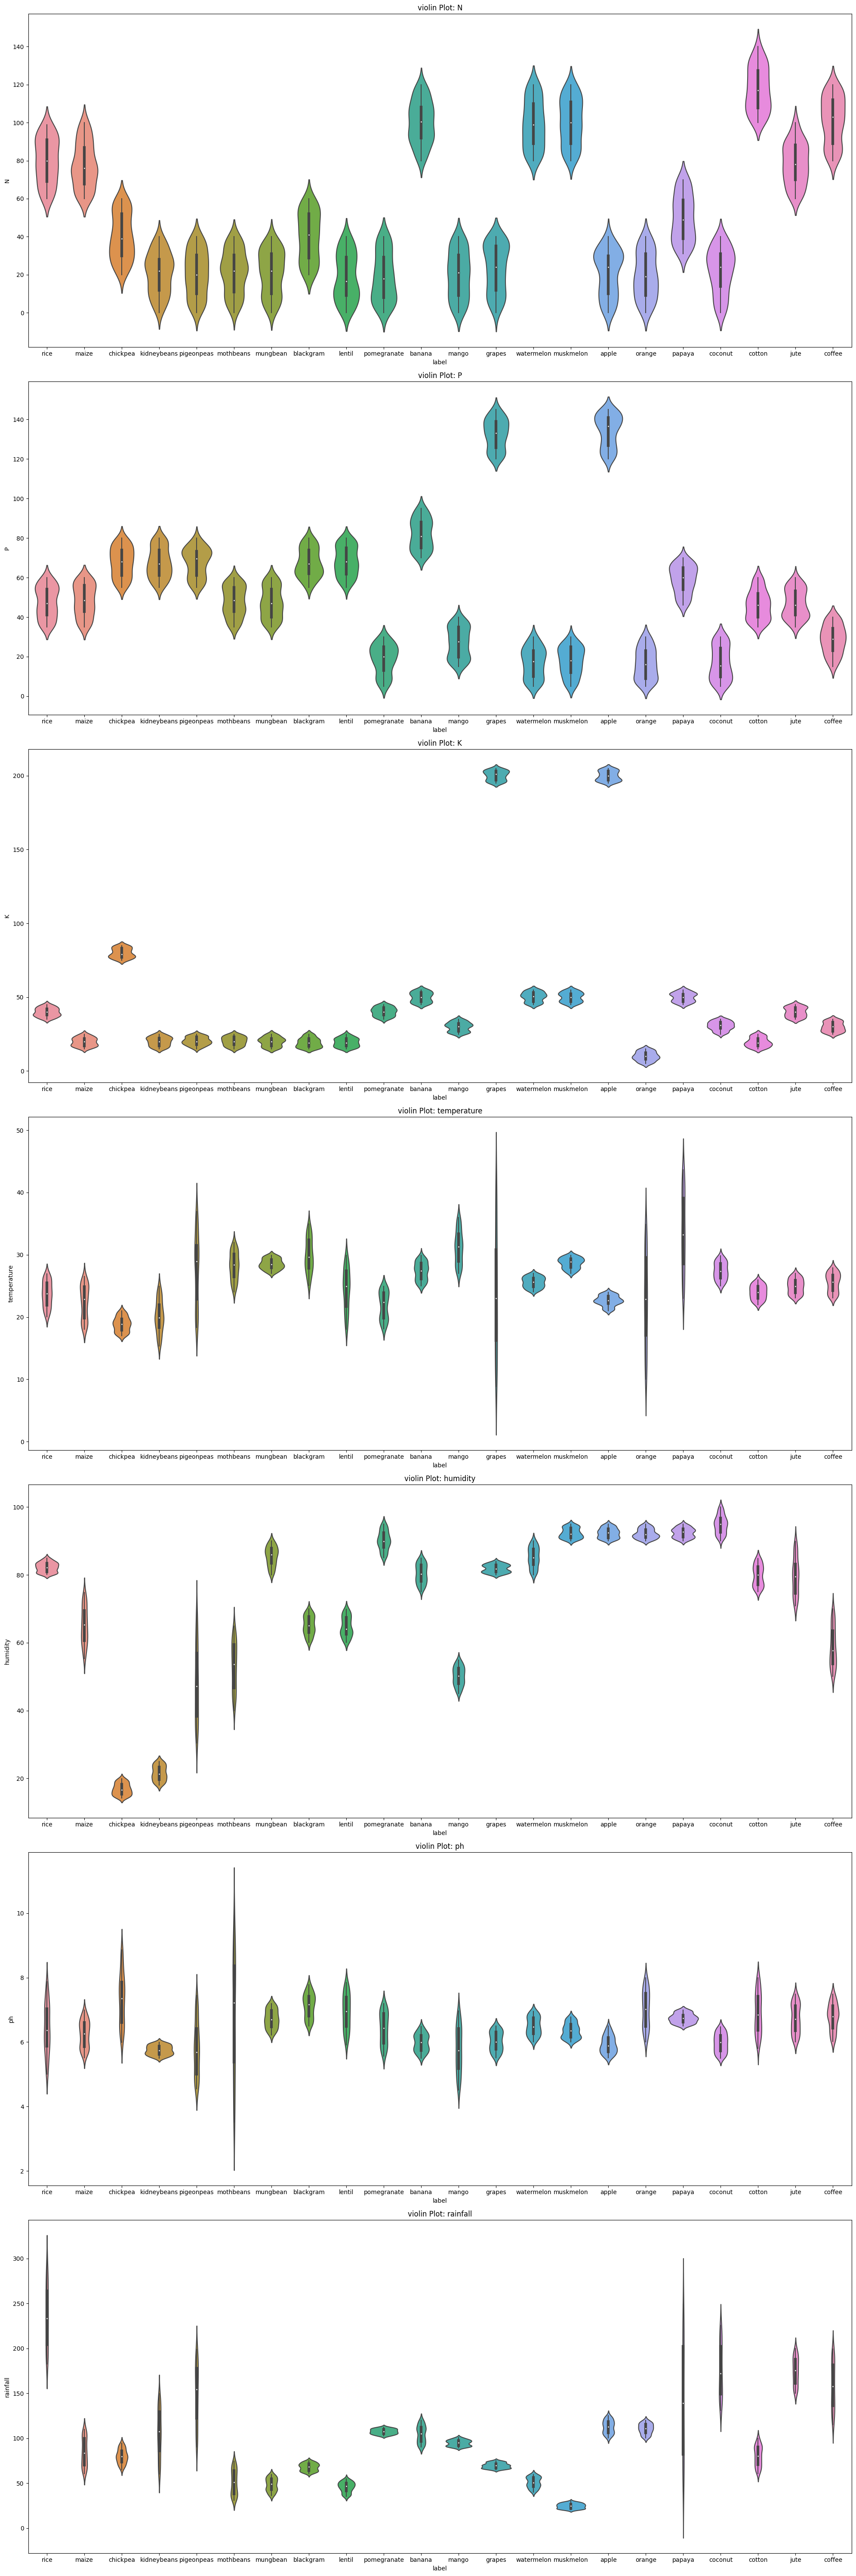

In [36]:
## violin plot: features vs corp type

def plot_features_violin(features):
    fig, axes = plt.subplots(7,1,figsize=(20, 60))
    axes = axes.flatten()
    for i,col in enumerate(features):
        sns.violinplot(x=df["label"], y=df[col],ax=axes[i])
        axes[i].set_title(f"violin Plot: {col}")

    for i in range(len(features), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

features = df.columns[:-1]
plot_features_violin(features)

From the violin plots it is clear that labels are affected by all the features differently.  
There are corps that can grow in any rainfall example papaya but rice needs high rainfall.  
mothbeans can grow in any pd levels, whereas other corps require medium ph labels.

No further EDA is required.